In [1]:
!pip install "numpy<2.3"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install openpyxl

In [3]:
df_scaled=pd.read_csv('processed_heart_data.csv')
df_scaled.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Weight_(kg)_log,BMI_log,Alcohol_Consumption_log,Fruit_Consumption_log,Green_Vegetables_Consumption_log,FriedPotato_Consumption_log
0,0.0,3.0,0,0,0,0,0,0,1,0,...,-0.621527,0.006625,0.059597,0.664502,3.516310,-3.028379,-0.910061,0.393307,0.469585,1.083238
1,3.0,4.0,0,1,0,0,0,3,0,0,...,-0.621527,0.006625,-1.012342,-0.267579,4.358118,0.051097,-0.910061,0.393307,-2.315261,0.060136
2,3.0,4.0,1,0,0,0,0,3,0,0,...,-0.133707,-0.716973,-0.811354,1.130543,4.493680,0.842276,0.464207,-0.471177,-0.952633,1.370478
3,0.0,4.0,1,1,0,0,0,3,0,1,...,-0.621527,0.006625,0.997544,0.198462,4.547965,0.123540,-0.910061,0.393307,1.060102,0.689501
4,2.0,4.0,0,0,0,0,0,0,0,1,...,-0.621527,-0.877772,-0.744358,-0.733620,4.493680,-0.646970,-0.910061,-0.836975,-0.733299,-1.663148


In [4]:
# Step 1 - Train/test split
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Heart_Disease', axis=1)
y=df_scaled['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
df_scaled['Heart_Disease'].value_counts(normalize=True)

Heart_Disease
0    0.91915
1    0.08085
Name: proportion, dtype: float64

In [6]:
# Step 2 - Train a Baseline Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize model with class weighting to handle imbalance
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
# Step 3 - Make Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1] # Probabilities for ROC AUC


In [8]:
# Step 4 - Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc: .4f}")

Confusion matrix
[[41525 15252]
 [  986  4008]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     56777
           1       0.21      0.80      0.33      4994

    accuracy                           0.74     61771
   macro avg       0.59      0.77      0.58     61771
weighted avg       0.91      0.74      0.80     61771


ROC AUC Score:  0.8394


| Type                       | Count | Meaning                              |
| -------------------------- | ----- | ------------------------------------ |
|  **True Negatives (TN)**  | 41525 | Correctly predicted no heart disease |
|  **False Positives (FP)** | 15252 | Incorrectly predicted heart disease  |
|  **False Negatives (FN)** | 986   | Missed actual heart disease cases    |
|  **True Positives (TP)**  | 4008  | Correctly predicted heart disease    

| Metric        | Value | Interpretation                                        |
| ------------- | ----- | ----------------------------------------------------- |
| **Precision** | 0.21  | Only 21% of predicted heart disease cases are correct |
| **Recall**    | 0.80  | Great! 80% of actual heart disease cases are caught |
| **F1-score**  | 0.33  | Low → due to low precision                            |

Catching most heart disease cases (high recall)
Very good AUC → model is learning the difference well

Problems:

Precision is low (21%) → Many false alarms (predicting disease when there’s none)
F1-score is low due to the imbalance between precision and recall

This is not ideal in a real-world medical setting — too many false positives can overwhelm the system or alarm patients unnecessarily.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with class weights
rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None, # can be tuned later
    n_estimators=100,
    random_state=42,
    n_jobs=-1 # use all available CPU cores
)

In [10]:
# Train model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:,1]  # Probabilities for AUC

In [12]:
# Evaluate the model

In [13]:
# Confusion matrix
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nClassification Report: ")
print(classification_report(y_test, y_pred_rf))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_rf_proba)
print(f"\nROC AUC Score: {roc_auc: .4f}")

Confusion matrix
[[56653   124]
 [ 4880   114]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56777
           1       0.48      0.02      0.04      4994

    accuracy                           0.92     61771
   macro avg       0.70      0.51      0.50     61771
weighted avg       0.88      0.92      0.88     61771


ROC AUC Score:  0.8155


| Metric                     | Value  | Meaning                                   |
| -------------------------- | ------ | ----------------------------------------- |
|  **True Negatives (TN)**  | 56,653 | Predicted no disease correctly            |
|  **False Positives (FP)** | 124    | Predicted disease incorrectly             |
|  **False Negatives (FN)** | 4,880  | **Missed** heart disease cases (very bad) |
|  **True Positives (TP)**  | 114    | Predicted disease correctly               |
| Metric        | Value       | Notes                                                                 |
| ------------- | ----------- | --------------------------------------------------------------------- |
| **Precision** | 0.48        | Almost half of predicted heart disease cases are correct — okay-ish   |
| **Recall**    | **0.02**  | Only **2%** of actual heart disease cases are detected — **very bad** |
| **F1-score**  | 0.04        | Extremely low overall effectiveness for class `1`                     |
ROC AUC = 0.8155
Slightly worse than logistic regression (which had 0.839)

Tells us: the model has learned some signal, but the threshold is the problem

What Went Wrong?
Random Forest is:
Very conservative → it almost always predicts "no heart disease" (class 0)
Why? Because 92% of your data is class 0 — the model is overwhelmed by the majority
It minimizes total error but sacrifices the minority class
Even though you used class_weight='balanced', that alone isn’t enough.

In [14]:
# Threshold tuning
# Step 1 Get Precision, Recall, Thresholds
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_rf_proba)

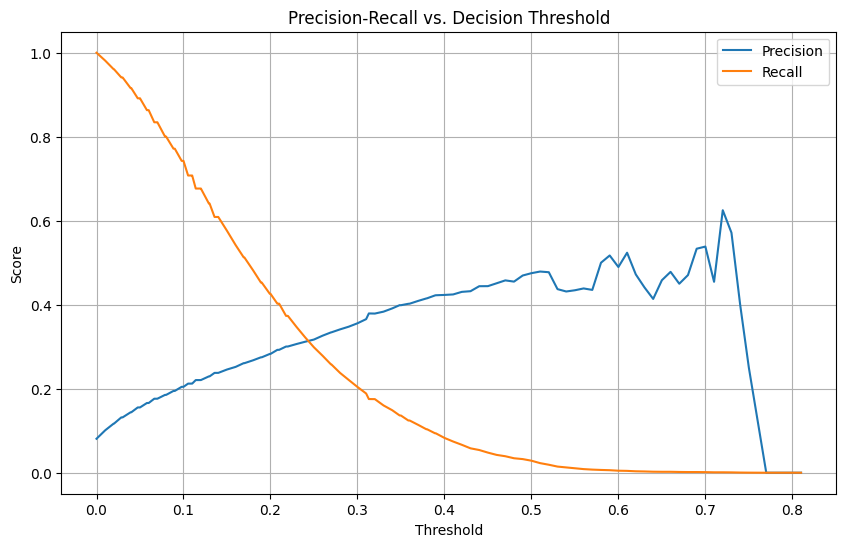

In [15]:
# Step 2 Plot Precision and Recall vs Threshold
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Find best F1-score

In [17]:
from sklearn.metrics import f1_score

best_thresh = 0
best_f1 = 0

for t in thresholds:
    y_pred_t = (y_pred_rf_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best threshold for F1-score: {best_thresh:.3f}")
print(f"Best F1-score: {best_f1:.3f}")


Best threshold for F1-score: 0.169
Best F1-score: 0.346


F1-score = harmonic mean of precision and recall

Good when you want balance

Especially useful in imbalanced datasets

Prevents model from cheating by having super high recall or precision only

In [19]:
y_pred_best = (y_pred_rf_proba >= 0.169).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix at Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report at Optimal Threshold:")
print(classification_report(y_test, y_pred_best))


Confusion Matrix at Optimal Threshold:
[[49520  7257]
 [ 2433  2561]]

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     56777
           1       0.26      0.51      0.35      4994

    accuracy                           0.84     61771
   macro avg       0.61      0.69      0.63     61771
weighted avg       0.90      0.84      0.87     61771



### XGBoost model with class imbalance handling

In [20]:
!pip install XGBoost

In [21]:
# Step 1 - Train XGBoost with Scale Pos Weight
from xgboost import XGBClassifier

# Calculate class imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    scale_pos_weight = scale_pos_weight, # handle imbalance
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [22]:
# Step 2 - Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb_proba))


Confusion Matrix:
[[41877 14900]
 [ 1121  3873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56777
           1       0.21      0.78      0.33      4994

    accuracy                           0.74     61771
   macro avg       0.59      0.76      0.58     61771
weighted avg       0.91      0.74      0.80     61771

ROC AUC Score: 0.8323512176779915


In [ ]:
print("Jupyter is working.")

In [ ]:
print("Starting XGBoost threshold optimization...")

In [23]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_xgb_proba)

# Debug prints to verify data
print("Thresholds found:", len(thresholds))
print("Sample thresholds:", thresholds[:5])
print("Sample probabilities:", y_pred_xgb_proba[:5])
print("Sample true labels:", y_test[:5])

# Step 2: Find best threshold for max F1-score
if len(thresholds) == 0:
    print("No thresholds found — check your prediction probabilities.")
else:
    best_thresh = 0
    best_f1 = 0

    # Iterate through thresholds to find the best F1-score
    for t in thresholds:
        y_pred_t = (y_pred_xgb_proba >= t).astype(int)
        f1 = f1_score(y_test, y_pred_t)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t
    
    # Print best threshold and score
    print(f"\nBest threshold for F1: {best_thresh:.3f}")
    print(f"Best F1-score: {best_f1:.3f}")

Thresholds found: 61681
Sample thresholds: [6.92439498e-05 1.16809795e-04 1.41249373e-04 1.45393366e-04
 2.33805011e-04]
Sample probabilities: [0.24516761 0.04557217 0.11895686 0.7634233  0.6581076 ]
Sample true labels: 36889     0
147153    0
112951    0
97128     0
162331    0
Name: Heart_Disease, dtype: int64

Best threshold for F1: 0.715
Best F1-score: 0.363


In [24]:
# Apply best threshold and reprint classification report
y_pred_best_thresh = (y_pred_xgb_proba >= best_thresh).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix with Best Threshold:")
print(confusion_matrix(y_test, y_pred_best_thresh))

print("\nClassification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best_thresh))


Confusion Matrix with Best Threshold:
[[50510  6267]
 [ 2493  2501]]

Classification Report with Best Threshold:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     56777
           1       0.29      0.50      0.36      4994

    accuracy                           0.86     61771
   macro avg       0.62      0.70      0.64     61771
weighted avg       0.90      0.86      0.88     61771



| Metric            | Default Threshold (0.5) | Tuned Threshold (0.715) |
| ----------------- | ----------------------- | ----------------------- |
| **Precision (1)** | 0.21                    | 0.29                    |
| **Recall (1)**    | 0.78                    | 0.50                    |
| **F1-score (1)**  | 0.33                    | 0.36                   |
| **Accuracy**      | 74%                     | 86%                   |
| **ROC AUC**       | 0.83                   | \~0.83 (same)           |
| **TP (1)**        | 3873                    | 2501                    |
| **FP (0)**        | 14900                   | 6267                   |
Key Takeaways
 What Improved:

Precision on class 1 (positive cases) improved from 21% → 29%

False positives were cut by more than half (from 14.9k → 6.2k), improving the model's trustworthiness.

Overall accuracy jumped from 74% → 86%

 What Dropped:

Recall on class 1 decreased from 78% → 50%

Meaning: you're now missing more true positives (miss rate went from 22% → 50%)

Stick with Default Threshold (0.5):

Missing heart disease cases is unacceptable

You're prioritizing recall over everything (e.g., as a pre-screening tool)

You plan to flag all possible risks for follow-up, even with false alarms

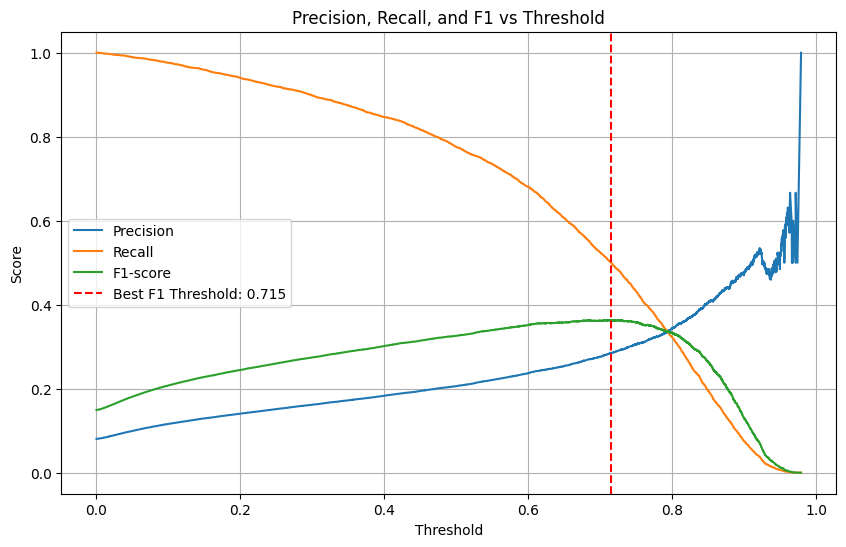

In [25]:
# Visualize Precision vs Recall vs F1 vs Threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-score')
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best F1 Threshold: {best_thresh:.3f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 vs Threshold")
plt.legend()
plt.grid()
plt.show()


In [26]:
# Custom F1 for class 1 only
from sklearn.metrics import precision_score, recall_score

precision_1 = precision_score(y_test, y_pred_best_thresh, pos_label=1)
recall_1 = recall_score(y_test, y_pred_best_thresh, pos_label=1)
f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1 + 1e-10)
print(f"Class 1 - Precision: {precision_1:.3f}, Recall: {recall_1:.3f}, F1: {f1_1:.3f}")


Class 1 - Precision: 0.285, Recall: 0.501, F1: 0.363


| Model                        | Precision (1) | Recall (1) | F1 (1) | Accuracy | ROC AUC | Notes                                   |
| ---------------------------- | ------------- | ---------- | ------ | -------- | ------- | --------------------------------------- |
| **1. Logistic Regression**   | 0.21          | 0.80       | 0.33   | 74%      | 0.839   | Strong recall, weak precision           |
| **2. Random Forest**         | 0.48          | 0.02       | 0.04   | 92%      | 0.816   | Severe underfitting on class 1          |
| **3. Random Forest (Tuned)** | –             | –          | 0.35   | –        | –       | Threshold tuned to F1 = 0.35            |
| **4. XGBoost (default)**     | 0.21          | 0.78       | 0.33   | 74%      | 0.832   | Nearly identical to Logistic Regression |
| **5. XGBoost (tuned)**       | 0.285         | 0.501      | 0.363  | 86%      | 0.832   | Balanced precision/recall after tuning  |


Quick Observations
- Logistic Regression

Very similar to XGBoost default.

High recall, low precision.

Slightly better AUC than XGBoost (0.839 vs 0.832).

Good baseline, still relevant if interpretability matters.

- Random Forest (default)

Terrible recall on class 1: only 2%!

Precision is high (0.48) but that's misleading — it found only 114 out of 4994 positive cases.

High accuracy due to class imbalance.

Not usable for heart disease detection without tuning.

- Random Forest (tuned threshold)

F1 = 0.346 → better than RF default.

Likely improved recall, but we don't have the full report.

Shows RF can be salvaged, but not outperforming XGBoost.

- XGBoost (default threshold)

Similar to Logistic Regression: high recall (~0.78), low precision (~0.21).

ROC AUC = 0.832 → very good ranking ability.

Can be tuned to improve precision/accuracy.

- XGBoost (tuned threshold: 0.715)

Best overall balance of all models:

Precision = 0.285

Recall = 0.501

F1 = 0.363 - good

Accuracy = 86% (much higher than LR or default XGB)

Still captures half of the real positive cases.

ROC AUC unchanged (still 0.832), which makes sense — threshold tuning doesn't affect AUC.

 Best Performing model
 | Metric                | Winner                   | Reason                                       |
| --------------------- | ------------------------ | -------------------------------------------- |
| **Highest Recall**    | Logistic / XGB (default) | \~78–80% recall, best for catching positives |
| **Highest Precision** | Random Forest (default)  | 0.48 — but **useless recall**                |
| **Best F1 (class 1)** | **XGBoost (tuned)**      | 0.363  — best precision-recall balance      |
| **Best Accuracy**     | XGBoost (tuned)          | 86%                                         |
| **Best AUC**          | Logistic Regression      | 0.839 — slightly better ranking ability      |

| Goal                                                                                      | Best Model                                         |
| ----------------------------------------------------------------------------------------- | -------------------------------------------------- |
| **We want to flag high-risk patients while minimizing false positives (trust)**          |  **XGBoost with tuned threshold (0.715)**         |
| **We want to catch as many heart disease cases as possible, and false positives are OK** | Logistic Regression or XGBoost (default threshold) |
| **We want a balance of both**                                                            |  XGBoost (tuned) — F1 of 0.363 and good accuracy  |


In [27]:
# Set up SHAP
!pip install shap

In [28]:
!pip install --upgrade numba

In [ ]:
!pip install "numpy<2.3" --upgrade --force-reinstall

In [29]:
# Import and Initialize SHAP Explainer
import shap

# Create explainer for XGBoost
explainer = shap.Explainer(xgb_model)

# Compute SHAP values on a sample
shap_values = explainer(X-test)

C:\Users\jsrri\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'test' is not defined